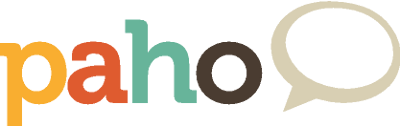

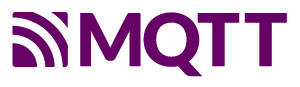

[Página do projeto](https://pypi.org/project/paho-mqtt/)

[MQTT and Python For Beginners -Tutorials](http://www.steves-internet-guide.com/mqtt-python-beginners-course/)

#Introdução

Em uma rápida retrospectiva:
* aprendemos tudo sobre Python
* vimos como utilizar bibliotecas para otimizar nosso código e nosso trabalho
* vimos também como funcionam o NumPy e o Pandas.

Vamos agora ver como aplicaremos todo esse conhecimento na geração de  _pipeline_ de trabalho com Python, fazendo uso de todo o conhecimento adquirido.

---
**Curiosidade**:

O termo "_pipeline_" neste contexto e em tradução livre significa algo como "fluxo" ou "fluxo de trabalho". Então seria meio que repetitivo (quase um pleonasmo) falar "_pipeline_ de trabalho", como dizemos aqui. A intenção é trazer esse termo para que quando você ouvir, saiba do que se trata, pois é o termo utilizado atualmente na área. Mas o correto seria dizer "fluxo de trabalho" (ou em inglês: _workflow_).

---

# Conhecendo o MQTT

Significado
---
A sigla MQTT vem de _**M**essage **Q**ueue **T**elemetry **T**ransport_

Portanto MQTT significa algo como **transporte de telemetria por fila de mensagens**, ou seja, uma forma de enviar informações sobre coisas medidas por meio de mensagens em fila.

O que é?
---
Protocolo largamente aceito e empregado em IoT. Desenvolvido em cima do TCP no final dos anos 1990 pela IBM, tornando-se um padrão aberto OASIS em 2014. O protocolo utiliza a arquitetura Publish/Subscribe desacoplando emissor e receptor da mensagem.

Por que MQTT?
---
HTTP é síncrono, pois, o cliente espera que o servidor responda. Em IoT/IIoT a comunicação síncrona é um problema devido ao grande número de dispositivos, baixa confiabilidade e alta latência.

Porque não utilizar HTTP
---
**HTTP** é:
* **UNIDIRECIONAL**. Em IoT, dispositivos são clientes e não servidores aguardando comandos.
* PROTOCOLO **UM PARA UM**. É desejável um protocolo que permita o envio de mensagens para vários dispositivos.
* PROTOCOLO **PESADO** com muitos cabeçalhos e regras. Inadequado para redes com
restrições de desempenho. Além disso, diversos estudos mostram melhor desempenho do MQTT em relação ao HTTP no cenário de IoT/IIoT. Há bibliotecas disponíveis que implementam o protocolo.

Mensagens no protocolo MQTT
---
Cliente envia mensagem CONNECT ao broker para estabelecer conexão.
1. Cliente recebe uma mensagem CONNACK.
    * CONNACK vem de _**CONN**ection **ACK**nowledge_ ou seja, em português, **reconhecimento de conexão**
2. Cliente envia mensagem SUBSCRIBE para tópicos de interesse.
    * SUBSCRIBE significa **inscrição** ou **inscrever**
3. Cliente recebe mensagem SUBACK.
    * SUBACK vem de _**SUB**scribe **ACK**nowledge_ ou seja, em português, **reconhecimento de inscrição**
4. Cliente pode enviar mensagens PUBLISH para um tópico com carga útil de dados.
    * PUBLISH significa **publicação** ou **publicar**
5. O broker encaminha a mensagem para todos os clientes do tópico.
6. Cliente recebe mensagens SUBACK.
7. Cliente pode enviar mensagens PUBLISH para um tópico com carga útil de dados e o broker encaminha a mensagem para todos os clientes do tópico.

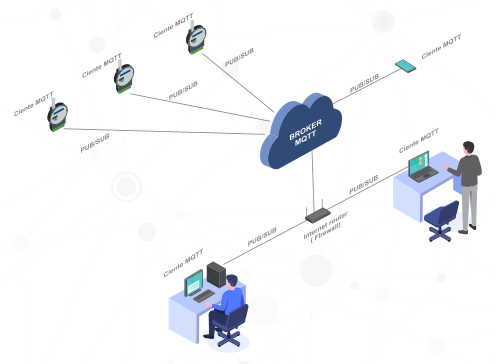

Qualidade do Serviço (QoS – _Quality of Service_) no MQTT
---
A QoS dá ao cliente o poder de escolher um nível de serviço que corresponda à confiabilidade da rede e à lógica do aplicativo. Como o MQTT gerencia a retransmissão de mensagens e garante a entrega (mesmo quando o transporte subjacente não é confiável), a QoS facilita muito a comunicação em redes não confiáveis. Existem 3 níveis de QoS no MQTT:
* No máximo uma vez (0);
* Pelo menos uma vez (1);
* Exatamente uma vez (2).

Nível de QoS igual a ZERO (`0`)
---
É o menor nível: garante uma entrega com o menor esforço, ou seja, não há
garantia de entrega. O destinatário não reconhece o recebimento da mensagem e a mensagem não é armazenada e retransmitida pelo remetente ("dispara e esquece“).

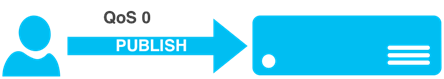

Nível de QoS igual a UM (`1`)
---
Garante que uma mensagem seja entregue pelo menos uma vez ao destinatário. O
remetente armazena a mensagem até receber um pacote `PUBACK` do destinatário. É possível que uma mensagem seja enviada ou entregue várias vezes.


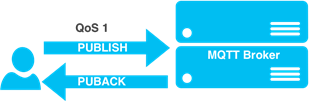

Nível de QoS igual a DOIS (`2`)
---
É o nível mais alto de serviço no MQTT – o mais seguro e o mais lento.

Este nível garante que cada mensagem seja recebida apenas uma vez pelos destinatários pretendidos. A garantia é fornecida por pelo menos dois fluxos de solicitação / resposta (um handshake de quatro partes) entre o remetente e o destinatário. O remetente e o destinatário usam o identificador de pacote da mensagem `PUBLISH` original para coordenar a entrega da mensagem.

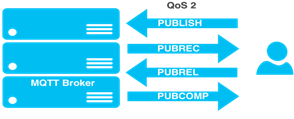

# Broker

Um "_broker_" MQTT é um servidor que recebe todas as mensagens de todos os clientes e direciona para os clientes de destino. Pela baixa demanda processual, qualquer dispositivo pode servir de _broker_ MQTT, desde um microcontrolador (como um Arduino ou Raspberry Pi) até servidores enormes e serviços de hospedagem em nuvem.

[http://www.hivemq.com/demos/websocket-client/](http://www.hivemq.com/demos/websocket-client/)

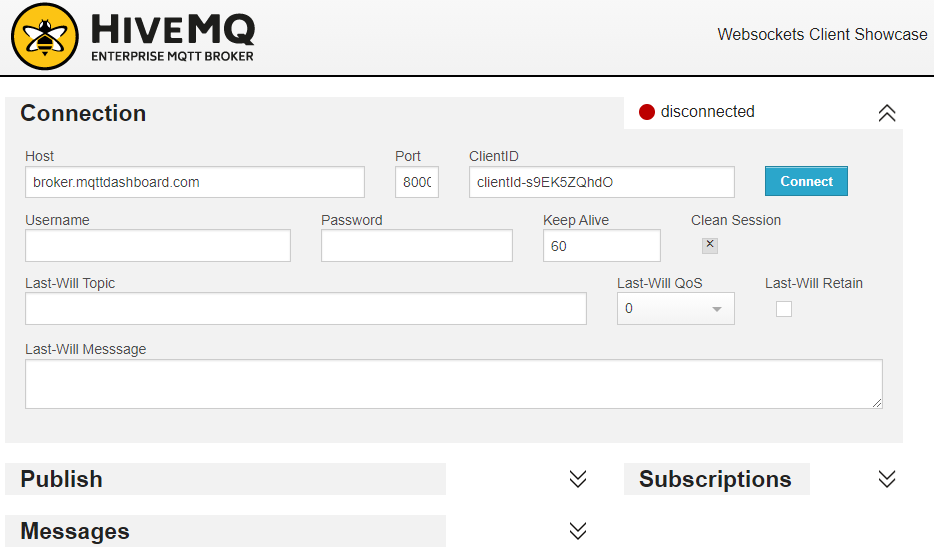

---

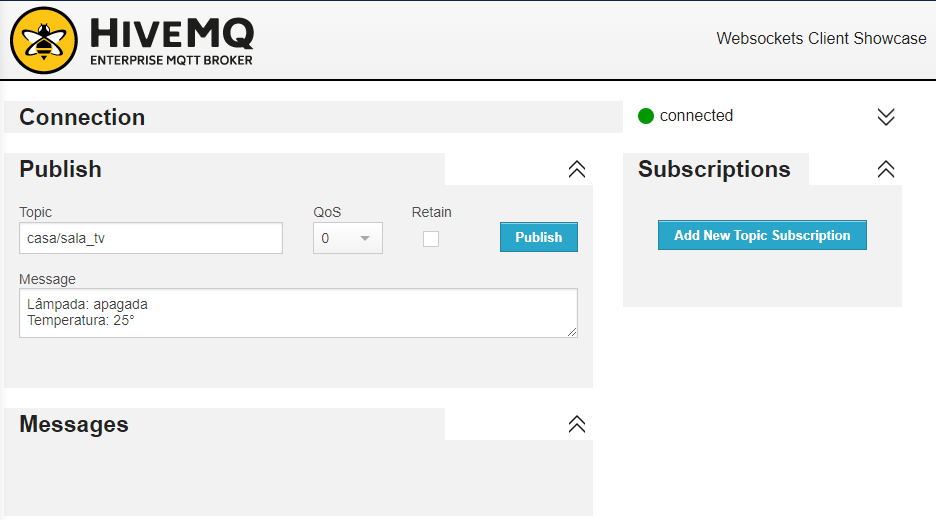

In [ ]:
import time # para utilizarmos uma 'pausa' no código

In [ ]:
# importando o MÓDULO 'client' do PACOTE 'mqtt' da BIBLIOTECA 'paho'
import paho.mqtt.client as mqtt

# Utilizando o paho MQTT

## Instalando e Importando a biblioteca

In [ ]:
# instalando o pacote paho-mqtt
!pip install paho-mqtt

# Passo a passo da criação do programa

## Cliente (_Client_)

### Criando um objeto `Client` (uma instância da classe `Client`).

O "construtor" da classe recebe 4 parâmetros. 1 é **obrigatório** e 3 são **opcionais**.

O `client_id` é o parâmetro obrigatório, e ele tem que ser um valor único, para que não exista mais de um cliente com o mesmo ID.
```python
cliente = mqtt.Client(client_id="",       # identificador (ID) único
                      clean_session=True, # opcional
                      userdata=None,      # opcional
                      protocol="MQTTv3")  # opcional
```

In [ ]:
id_do_cliente = "Aula_MQTT"

cliente = mqtt.Client(client_id=id_do_cliente, # identificador (ID) único
                      clean_session=True,      # opcional
                      userdata=None,           # opcional
                      protocol=mqtt.MQTTv31    # opcional
                      )

### **`.connect()`**

```python
conexao = cliente.connect(host,            # hostname ou endereço IP
                          port=1883,       # opcional
                          keepalive=60,    # opcional
                          bind_address="") # opcional
```


In [ ]:
# host_broker="broker.hivemq.com"
# host_broker="iot.eclipse.org"
host_broker = "broker.mqttdashboard.com"

conexao = cliente.connect(host_broker,       # hostname ou endereço IP
                        #   port=1883,       # opcional
                        #   keepalive=60,    # opcional
                        #   bind_address=""  # opcional
                          )

### **`.loop_start()`**

In [ ]:
cliente.loop_start()

### **`.subscribe()`**

[http://www.hivemq.com/demos/websocket-client/](http://www.hivemq.com/demos/websocket-client/)

In [ ]:
print("Inscrevendo...")
cliente.subscribe("casa/sala_tv") # inscrição no tópico 'sala_tv'
                                #  dentro do tópico 'casa'
# time.sleep(5)


# definindo callback (ligação de retorno)
def on_message(cliente, userdata, message):
    time.sleep(1)
    print("Mensagem recebida:")
    print(str(message.payload.decode("utf-8")))

while True:
    ###### Atrela função ao callback
    cliente.on_message = on_message
    ######

### Salvando dados recebidos em um arquivo `.csv`

Já vimos antes como utilizar o pandas para salvar arquivos `.csv` e até mesmo arquivos do Excel. Agora vejamos isso diretamente na prática integrando o conhecimento ao nosso código.

A primeira coisa que precisaremos é pensar na lógica de funcionamento.

Primeiramente precisaríamos criar o arquivo, mas apenas se ele já não existir. No caso de o arquivo já existir, precisamos apenas adicionar informação a ele.

In [ ]:
# importa a biblioteca que interage com o Sistema Operacional (OS)
import os
# importa o pandas tanto para criar a tabela quanto para salvar no .csv
import pandas as pd

In [ ]:
cliente.subscribe("fabrica/dados_equipamento") # inscrição no tópico
                                               # 'dados_equipamentos'
                                               # dentro do tópico 'fabrica'



# definindo callback (ligação de retorno)
def on_message(cliente, userdata, message):
    time.sleep(1)
    global dados_recebidos
    dados_recebidos = str(message.payload.decode("utf-8"))
    print("Mensagem recebida:")
    print(dados_recebidos)
    # print(str(message.payload.decode("utf-8")))

while True:
    ###### Atrela função ao callback
    cliente.on_message = on_message
    ######

Mensagem recebida:
[3615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0]


KeyboardInterrupt: ignored

In [ ]:
dados_recebidos

'[3615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0]'

In [ ]:
print(dados_recebidos)

[3615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0]


In [ ]:

# pega as informações no 'payload' da mensagem que chega via MQTT e salva de
# forma estruturada em um pandas.DataFrame
# dados = str(message.payload.decode("utf-8"))
# dados = [7615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,
        #  10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0]

# esses dados vêm em um formato parecido com este abaixo, retirado do kit IIoT
# do SENAI
# dados_opc_ua = [7615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,
#                 10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0]

# Assim precisamos saber o que cada dado significa. Para isso buscamos as
# informações no manual do equipamento.
#
# Neste caso as informações e o respectivo índice podem ser colocados em um
# dicionário como o abaixo
indices = {
    "Heartbeat": 0,
    "Entrada 0": 1,
    "Acumulador LOW entrada 0": 2,
    "Acumulador HIGH entrada 0": 3,
    "Entrada 1": 4,
    "Acumulador LOW entrada 1": 5,
    "Acumulador HIGH entrada 1": 6,
    "AD relativo 0": 7,
    "AD relativo 1": 8,
    "AD escalado (map) 0": 9,
    "AD escalado (map) 1": 10,
    "Saida CH0": 11,
    "Saida CH0 Contador": 12,
    "Saida CH1": 13,
    "Saida CH1 Contador": 14,
    "sem_det_15": 15, # sem informações
    "sem_det_16": 16, # sem informações
    "sem_det_17": 17, # sem informações
    "sem_det_18": 18, # sem informações
    "sem_det_19": 19, # sem informações
    "sem_det_20": 20, # sem informações
    "Escala MAP mínimo 0": 21,
    "Escala MAP máximo 0": 22,
    "AD absoluto 0": 23,
    "Offset mínimo 0": 24,
    "Offset máximo 0": 25,
    "sem_det_26": 26, # sem informações
    "Escala MAP mínimo 1": 27,
    "Escala MAP máximo 1": 28,
    "AD absoluto 1": 29,
    "Offset mínimo 1": 30,
    "Offset máximo 1": 31,
    "sem_det_32": 32, # sem informações
    "sem_det_33": 33, # sem informações
    "sem_det_34": 34, # sem informações
    "sem_det_35": 35, # sem informações
    "sem_det_36": 36, # sem informações
    "sem_det_37": 37, # sem informações
    "sem_det_38": 38, # sem informações
    "sem_det_39": 39, # sem informações
    "sem_det_40": 40, # sem informações
}

# Lembrando mais uma vez que existem diversas formas de se fazer a mesma coisa
# em programação. A escolha aqui foi pela forma que acreditamos ser mais
# didática.

# Vamos criar o pandas.DataFrame com as informações

# criando uma lista para receber os nomes das colunas
nomes_das_colunas = []

# agora vamos transformar as informações do dicionário em nomes das colunas na
# ordem correta
for chave, valor in indices.items():
    nomes_das_colunas.insert(valor, chave)


In [ ]:
len(nomes_das_colunas)

41

In [ ]:
nomes_das_colunas

['Heartbeat',
 'Entrada 0',
 'Acumulador LOW entrada 0',
 'Acumulador HIGH entrada 0',
 'Entrada 1',
 'Acumulador LOW entrada 1',
 'Acumulador HIGH entrada 1',
 'AD relativo 0',
 'AD relativo 1',
 'AD escalado (map) 0',
 'AD escalado (map) 1',
 'Saida CH0',
 'Saida CH0 Contador',
 'Saida CH1',
 'Saida CH1 Contador',
 'sem_det_15',
 'sem_det_16',
 'sem_det_17',
 'sem_det_18',
 'sem_det_19',
 'sem_det_20',
 'Escala MAP mínimo 0',
 'Escala MAP máximo 0',
 'AD absoluto 0',
 'Offset mínimo 0',
 'Offset máximo 0',
 'sem_det_26',
 'Escala MAP mínimo 1',
 'Escala MAP máximo 1',
 'AD absoluto 1',
 'Offset mínimo 1',
 'Offset máximo 1',
 'sem_det_32',
 'sem_det_33',
 'sem_det_34',
 'sem_det_35',
 'sem_det_36',
 'sem_det_37',
 'sem_det_38',
 'sem_det_39',
 'sem_det_40']

In [ ]:
import ast
dados_recebidos = ast.literal_eval(dados_recebidos)

In [ ]:
type(dados_recebidos)

list

In [ ]:
# insere os dados na tabela
df = pd.DataFrame([dados_recebidos])

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,3615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0


In [ ]:
# nomeia o cabeçalho da tabela
df.columns = nomes_das_colunas

In [ ]:
df

,Heartbeat,Entrada 0,Acumulador LOW entrada 0,Acumulador HIGH entrada 0,Entrada 1,Acumulador LOW entrada 1,Acumulador HIGH entrada 1,AD relativo 0,AD relativo 1,AD escalado (map) 0,AD escalado (map) 1,Saida CH0,Saida CH0 Contador,Saida CH1,Saida CH1 Contador,sem_det_15,sem_det_16,sem_det_17,sem_det_18,sem_det_19,sem_det_20,Escala MAP mínimo 0,Escala MAP máximo 0,AD absoluto 0,Offset mínimo 0,Offset máximo 0,sem_det_26,Escala MAP mínimo 1,Escala MAP máximo 1,AD absoluto 1,Offset mínimo 1,Offset máximo 1,sem_det_32,sem_det_33,sem_det_34,sem_det_35,sem_det_36,sem_det_37,sem_det_38,sem_det_39,sem_det_40
0,3615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0


In [ ]:
# se o arquivo não existe, o programa cria e ativa inserir os cabeçalhos
if not os.path.isfile('arquivo_leituras.csv'):
   df.to_csv('arquivo_leituras.csv', header='column_names')
# else it exists so append without writing the header
# senão (se o arquivo já existe) ele só adiciona informações
else: 
   df.to_csv('arquivo_leituras.csv', mode='a', header=False)

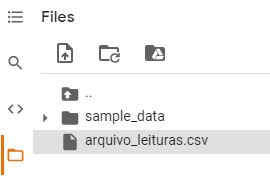

### **`.publish()`**

Para publicar, é ainda mais simples: basta conectar-se e enviar o tópico de destino junto da mensagem.

```python
cliente.publish(topic,
                payload=None,
                qos=0,
                retain=False)
```
```python
cliente.publish("casa/luz_sala","LIGAR")
```

In [ ]:
cliente.publish("casa/lampada_cozinha",
                payload="Acender Lâmpada",
                qos=0,
                retain=False)

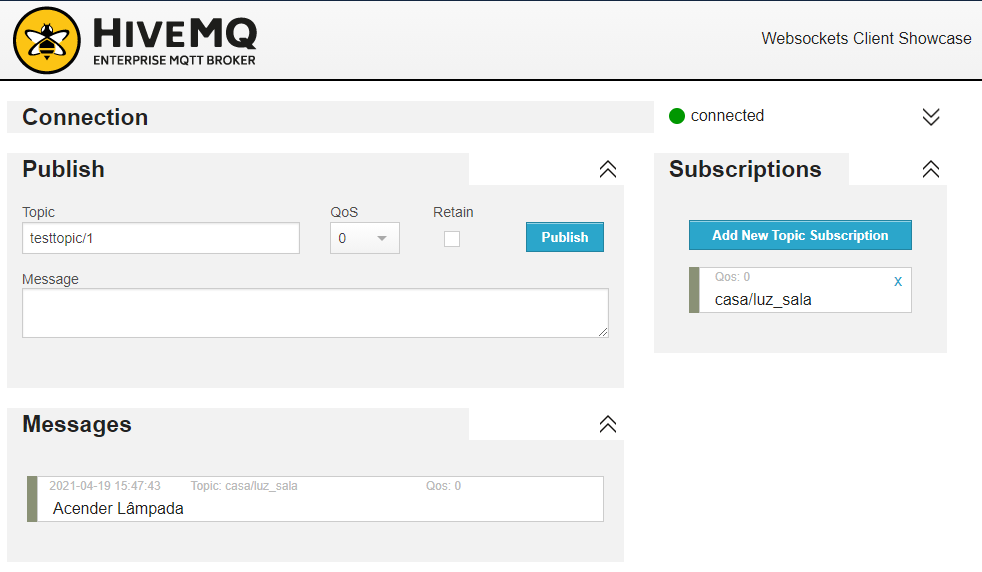

### **`.unsubscribe()`**

In [ ]:
cliente.unsubscribe("fabrica/dados_equipamento")

(0, 10)

In [ ]:
?cliente.unsubscribe()

### **`.disconnect()`**

In [ ]:
cliente.disconnect()

0

# Código completo **recebendo** informações

In [ ]:
# instalando o pacote paho-mqtt
!pip install paho-mqtt

     |████████████████████████████████| 102kB 7.2MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.1-cp37-none-any.whl size=61546 sha256=2af37851bb405e007e6b276d8c970538e8862b0a9bb70cd578d79dd25a5bbdf8
  Stored in directory: /root/.cache/pip/wheels/75/e2/f5/78942b19b4d135605e58dfe85fba52253b14d636aabf76904b
Successfully built paho-mqtt


[http://www.hivemq.com/demos/websocket-client/](http://www.hivemq.com/demos/websocket-client/)

In [ ]:
### IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS #####################################

# importando o MÓDULO 'client' do PACOTE 'mqtt' da BIBLIOTECA 'paho'
import paho.mqtt.client as mqtt
# importando a BIBLIOTECA 'pandas' para fazer a exportação para '.csv'
import pandas as pd
# importando a biblioteca do sistema operacional para etapa de salvar dados no
# arquivo .csv
import os
# importa biblioteca que permite utilizar o ast.literal_eval(), que converte um
# texto para um valor de variável e é MAIS SEGURO que o método nativo eval()
import ast

### CONFIGURAÇÕES ##############################################################

id_do_cliente = "Aula_MQTT"

# host_broker="broker.hivemq.com"
# host_broker="iot.eclipse.org"
host_broker = "broker.mqttdashboard.com"
# host_broker = "34.221.1.46"

# topico = "casa/sala_tv"
# topico = "/hab_iot"
topico = "fabrica/dados_equipamento"

### CRIANDO O CLIENTE ##########################################################
cliente = mqtt.Client(client_id=id_do_cliente, # identificador (ID) único
                      clean_session=True,      # opcional
                      userdata=None,           # opcional
                      protocol=mqtt.MQTTv31    # opcional
                      )

### CRIANDO A CONEXÃO ##########################################################
conexao = cliente.connect(host_broker,       # hostname ou endereço IP
                        #   port=1883,       # opcional
                        #   keepalive=60,    # opcional
                        #   bind_address=""  # opcional
                          )

### INICIANDO O LAÇO ###########################################################
cliente.loop_start()

try:
    print("Inscrevendo...")
    cliente.subscribe(topico) # inscrição no tópico 'sala_tv'
                              #  dentro do tópico 'casa'
    print("Inscrito.")
    # definindo callback (ligação de retorno)
    def on_message(cliente, userdata, message):
        # imprimindo a mensagem recebida
        print("message received:\t" ,str(message.payload.decode("utf-8")))

        # passando a mensagem para a variável 'dados'
        
        dados = ast.literal_eval(str(message.payload.decode("utf-8")))

        # criando uma lista para receber os nomes das colunas
        nomes_das_colunas = []

        # agora vamos transformar as informações do dicionário em nomes das colunas na
        # ordem correta
        for chave, valor in indices.items():
            nomes_das_colunas.insert(valor, chave)

        # insere os dados na tabela
        df = pd.DataFrame([dados])

        # nomeia o cabeçalho da tabela
        df.columns = nomes_das_colunas

        # se o arquivo não existe, o programa cria e ativa inserir os cabeçalhos
        if not os.path.isfile('arquivo_leituras.csv'):
            df.to_csv('arquivo_leituras.csv', header='column_names')
        # else it exists so append without writing the header
        # senão (se o arquivo já existe) ele só adiciona informações
        else: 
            df.to_csv('arquivo_leituras.csv', mode='a', header=False)
    
    while True:
        # Atrelando a função à função de retorno
        #
        # Essa função faz com que só aconteça impressão (print) de informação
        # se houver mensagem recebida
        cliente.on_message = on_message

except KeyboardInterrupt:
    print("Desconectando...")

finally:
    cliente.disconnect()
    print("Desconectado.")

Inscrevendo...
Inscrito.
message received:	 [7615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0]
message received:	 [5615,0,0,0,0,1,0,65275,65155,48250,47077,0,40,0,3,0,0,0,5,0,0,0,10000,0,208,1022,0,0,10000,0,209,769,0,0,0,5,1,1152,1,0,0]
Desconectando...
Desconectado.


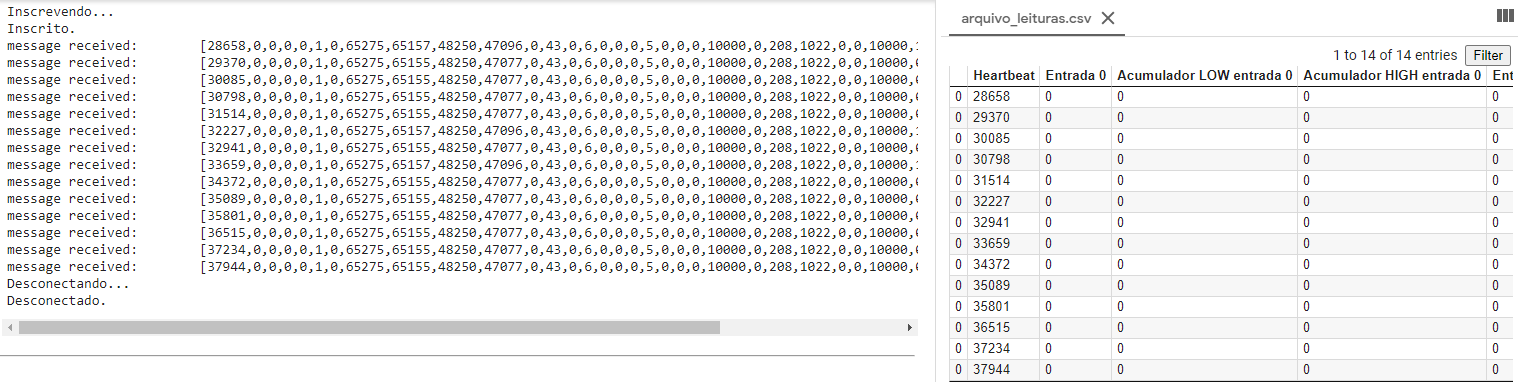

---

# Código completo **enviando** informações

In [ ]:
# instalando o pacote paho-mqtt
!pip install paho-mqtt

[http://www.hivemq.com/demos/websocket-client/](http://www.hivemq.com/demos/websocket-client/)

In [ ]:
# Para publicar 

### IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS #####################################

# importando o MÓDULO 'client' do PACOTE 'mqtt' da BIBLIOTECA 'paho'
import paho.mqtt.client as mqtt
# importando a BIBLIOTECA 'pandas' para fazer a exportação para '.csv'
import pandas as pd

### CONFIGURAÇÕES ##############################################################

id_do_cliente = "Aula_MQTT"

# host_broker="broker.hivemq.com"
# host_broker="iot.eclipse.org"
# host_broker = "broker.mqttdashboard.com"
host_broker = "34.221.1.46"

# topico = "casa/sala_tv"
topico = "/hab_iot"

### CRIANDO O CLIENTE ##########################################################
cliente = mqtt.Client(client_id=id_do_cliente, # identificador (ID) único
                      clean_session=True,      # opcional
                      userdata=None,           # opcional
                      protocol=mqtt.MQTTv31    # opcional
                      )

### CRIANDO A CONEXÃO ##########################################################
conexao = cliente.connect(host_broker,       # hostname ou endereço IP
                        #   port=1883,       # opcional
                        #   keepalive=60,    # opcional
                        #   bind_address=""  # opcional
                          )

### INICIANDO O LAÇO ###########################################################
cliente.loop_start()

### RODANDO A PUBLICAÇÃO DE MENSAGEM NO TÓPICO #################################
try:
    while True:
        topico , mensagem = input("Informe 'tópico,mensagem' a enviar:").split(',')

        cliente.publish(topico,
                        payload=mensagem,
                        qos=0,
                        retain=False)
        
except KeyboardInterrupt:
    print("Desconectando...")

finally:
    print("Desconectado.")
    cliente.disconnect()

```
!jupyter nbconvert --to html Storyboard_Notebook_Python_para_a_Indústria_4_0_bib_mqtt_paho_v01r06.ipynb
```